In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation


%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 12)

In [10]:
geo = pd.read_excel('geo.xlsx')

In [70]:
geo_pros = geo[geo['comment_class']==1]
geo_cons = geo[geo['comment_class']==-1]

In [78]:
x = geo['x']
y = geo['y']

x_pros = geo_pros['x']
y_pros = geo_pros['y']

x_cons = geo_cons['x']
y_cons = geo_cons['y']

In [101]:
inercia = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    clusters = kmeans.fit_predict(geo[['x','y']])
    inercia.append(kmeans.inertia_)

rng = range(2,20)
diff = np.diff(inercia)
# plt.plot(rng[1:], diff)
diff_r = diff[1:] / diff[:-1]

k_opt = rng[np.argmin(diff_r)+1]
k_opt

4

In [102]:
p_inercia = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    clusters = kmeans.fit_predict(geo_pros[['x','y']])
    p_inercia.append(kmeans.inertia_)

rng = range(2,20)
diff = np.diff(p_inercia)
# plt.plot(rng[1:], diff)
diff_r = diff[1:] / diff[:-1]
k_opt = rng[np.argmin(diff_r)+1]
k_opt

5

In [103]:
n_inercia = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    clusters = kmeans.fit_predict(geo_cons[['x','y']])
    n_inercia.append(kmeans.inertia_)

rng = range(2,20)
diff = np.diff(n_inercia)
# plt.plot(rng[1:], diff)
diff_r = diff[1:] / diff[:-1]
k_opt = rng[np.argmin(diff_r)+1]
k_opt

4

оптимальное количество кластеров - 5

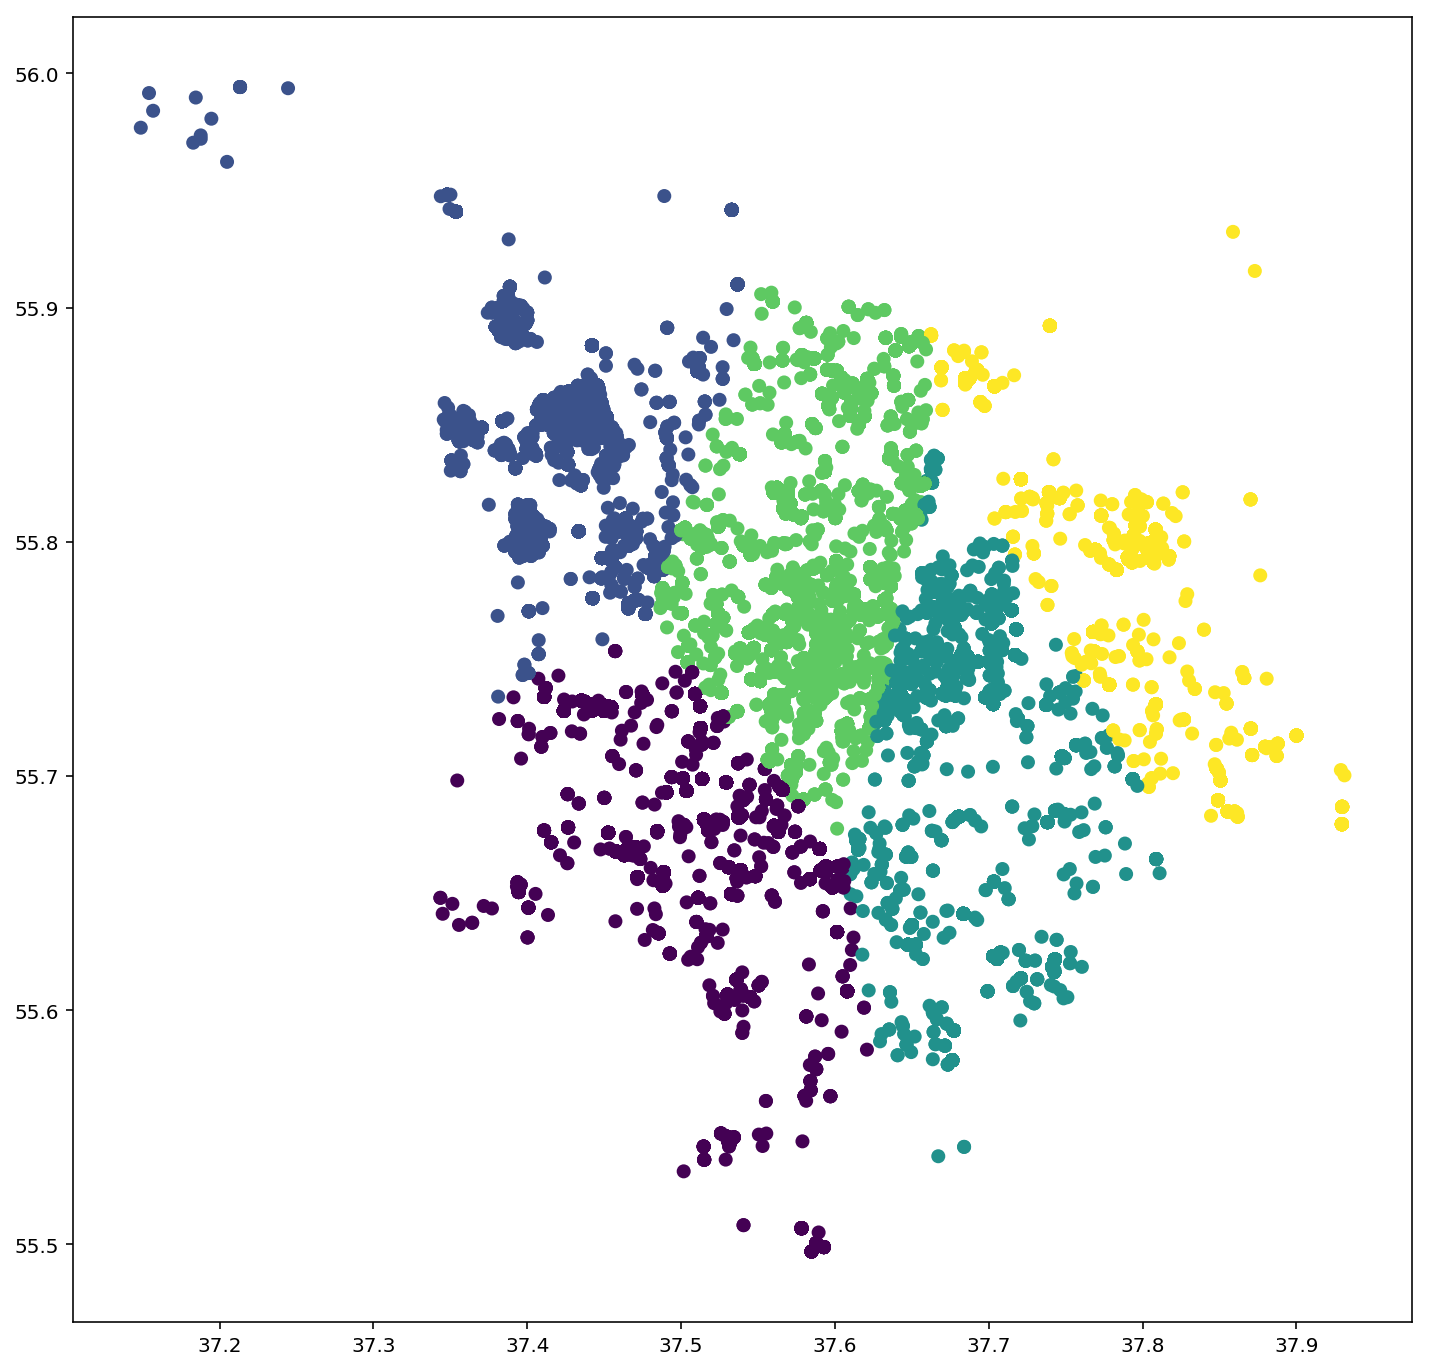

In [104]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(geo[['x','y']])
plt.scatter(x,y, c=clusters)

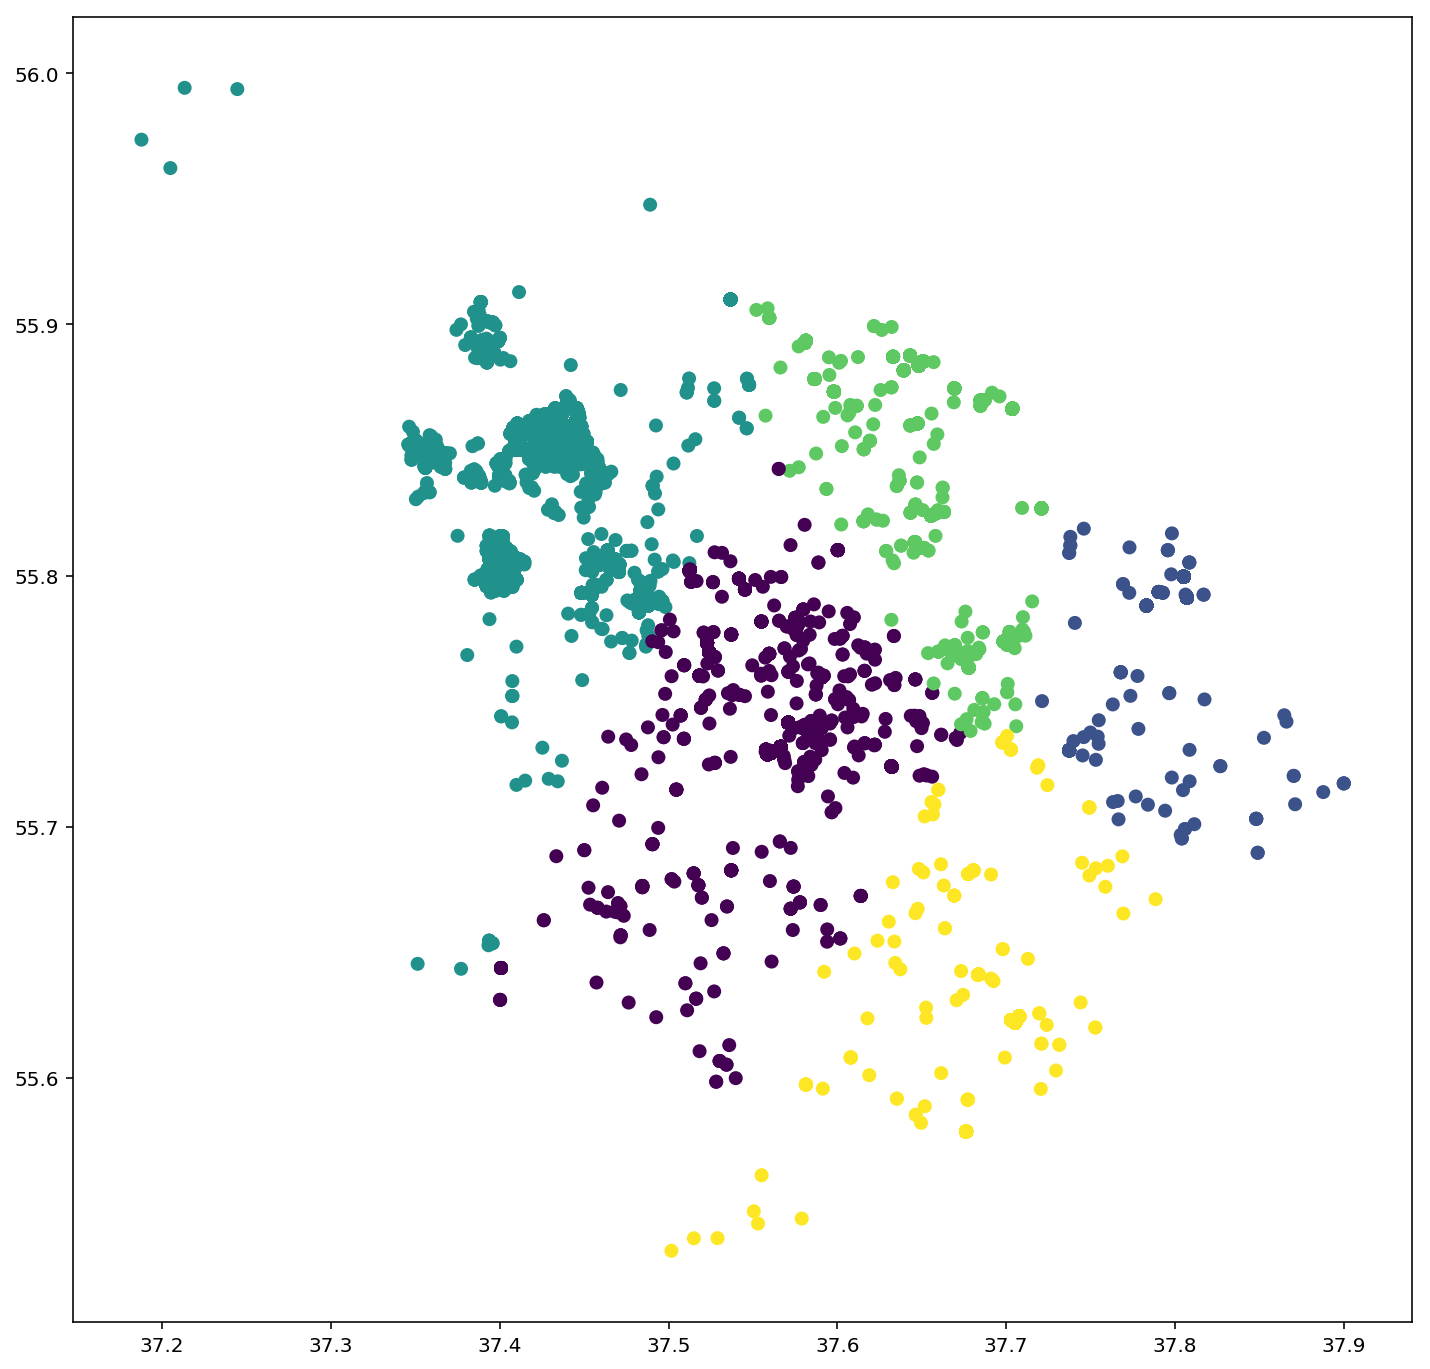

In [105]:
kmeans = KMeans(n_clusters=5)
clusters_pros = kmeans.fit_predict(geo_pros[['x','y']])
plt.scatter(x_pros,y_pros, c=clusters_pros)

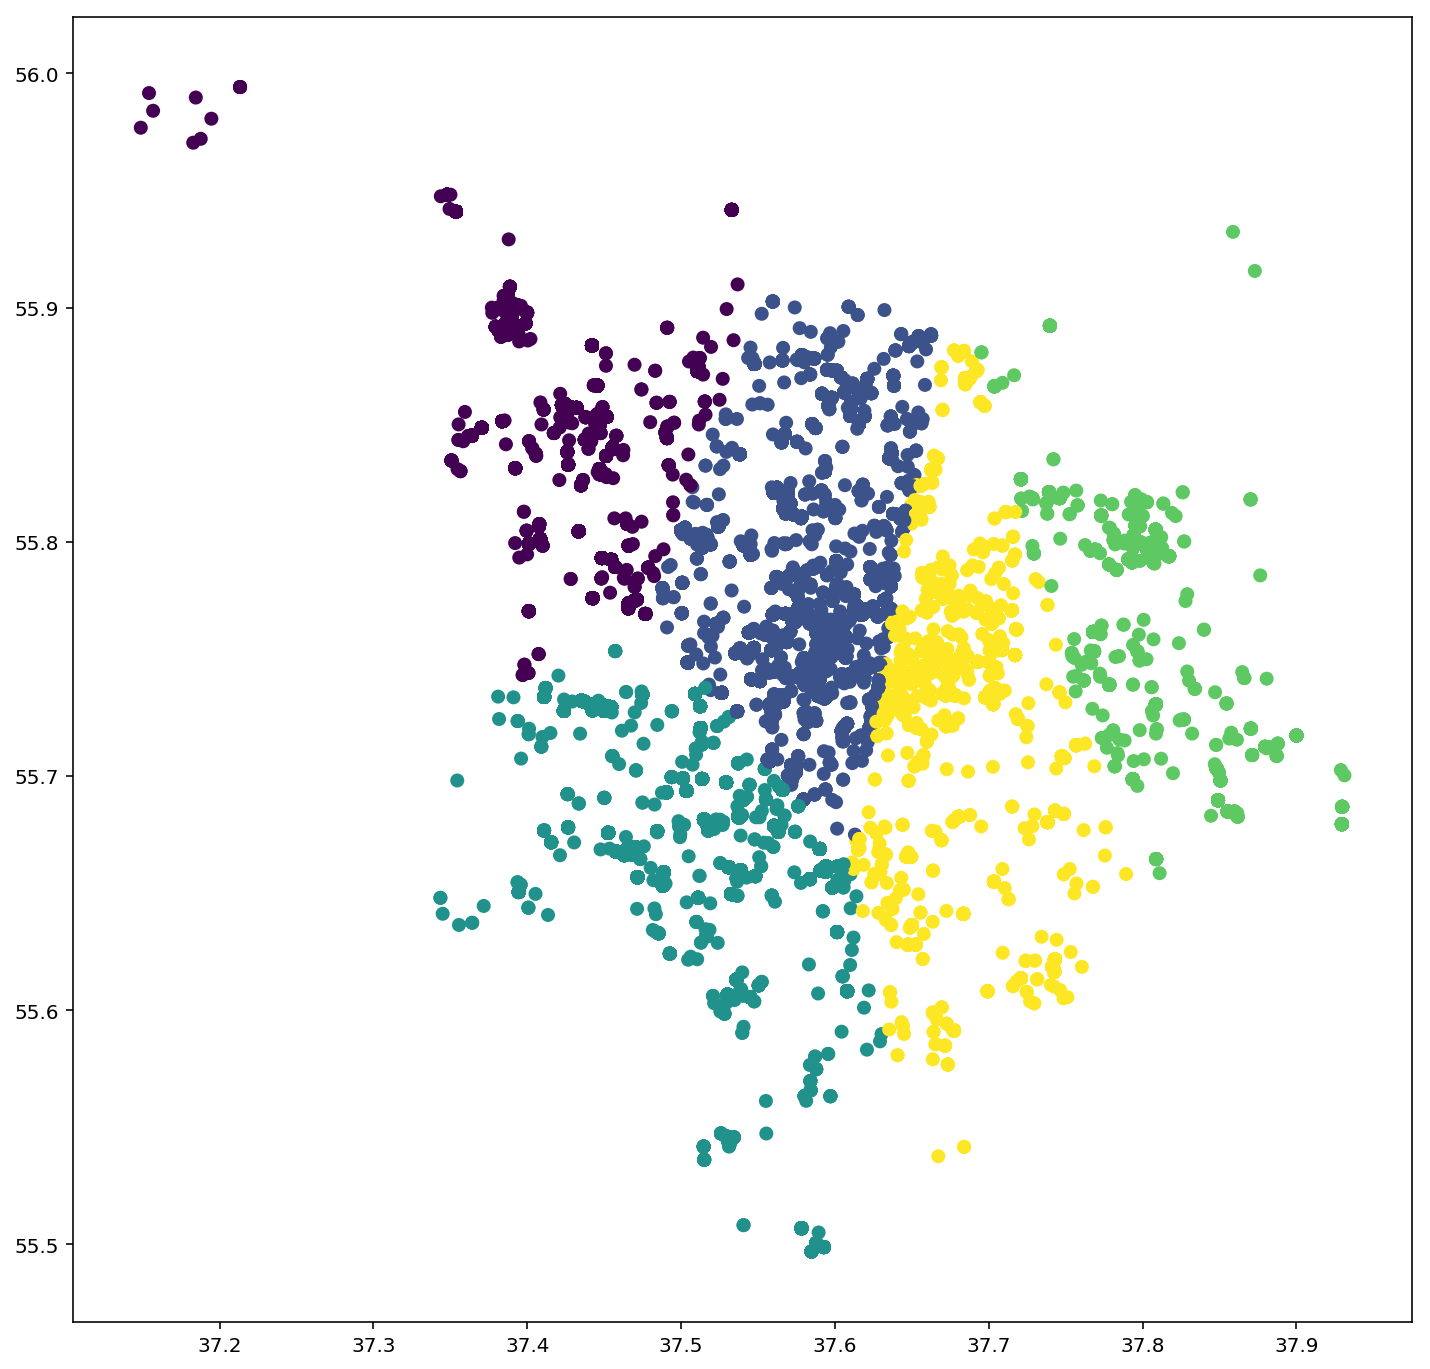

In [107]:
kmeans = KMeans(n_clusters=5)
clusters_cons = kmeans.fit_predict(geo_cons[['x','y']])
plt.scatter(x_cons,y_cons, c=clusters_cons)